In [125]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import statistics
%matplotlib inline
sns.set(style='darkgrid')

In [126]:
data=pd.read_csv(r'C:\Users\guzel\Desktop\airbnb_NYC\listings.csv')

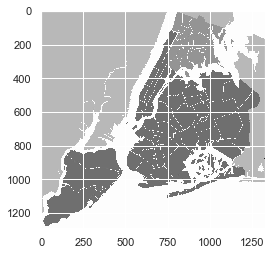

In [127]:
img=mpimg.imread('New_York_City_.png',0) 
plt.imshow(img)

In [128]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,10,48,2019-11-04,0.39,1,1
1,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,295,2019-11-22,4.67,1,1
2,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,78,2019-10-13,0.60,1,19
3,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,29,49,2017-10-05,0.38,1,365
4,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,454,2019-11-21,3.52,1,242


In [129]:
data.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [130]:
data.isnull().sum()

id                                    0
name                                 17
host_id                               0
host_name                           563
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10220
reviews_per_month                 10220
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [131]:
data.fillna({'name':0}, inplace=True)
data.fillna({'host_name':0}, inplace=True)
data.fillna({'last_review':0}, inplace=True)
data.fillna({'reviews_per_month':0}, inplace=True)
data.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

# Detect Outliers and Ignore Them

In [132]:
len(data.price)
data.price.median()
data.price.mean()
len(data.price[data.price > data.price.std()])
print(data.price.std())

348.08956197119085


# my attemps for figure out the anomalies:

In [133]:
min_p = min(data.price)
max_p = max(data.price)
print('Min price per night: {}, Max price per night: {} '.format(min_p,max_p))

Min price per night: 0, Max price per night: 10000 


# is there any cuter\readable plot option?

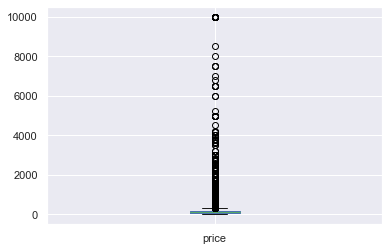

In [134]:
data.price.plot(kind='box')
plt.show()

### try hist

In [135]:
def find_anomalies():
    # Set upper and lower limit to 3 standard deviation
    price_std = data.price.std()
    price_mean = data.price.mean()
    cut_off = price_std * 3
    
    lower = price_mean - cut_off 
    upper = price_mean + cut_off

    price_anomalies = []    

    # Generate outliers
    for outlier in data.price:
        if outlier > upper or outlier < lower or outlier == 0:
            price_anomalies.append(outlier)
    return price_anomalies

find_anomalies()

[2000,
 2000,
 1300,
 1300,
 2000,
 2500,
 1395,
 1899,
 1700,
 1999,
 1500,
 6000,
 2000,
 2000,
 1500,
 1500,
 4000,
 5250,
 1500,
 1500,
 1500,
 1550,
 1250,
 1485,
 6500,
 2750,
 1500,
 2500,
 3750,
 1600,
 2300,
 4500,
 8000,
 6500,
 1400,
 2695,
 2000,
 1500,
 9999,
 2400,
 2000,
 1763,
 1450,
 2000,
 2000,
 1495,
 2000,
 10000,
 1600,
 1245,
 2000,
 2000,
 1500,
 9999,
 1731,
 1250,
 1800,
 2200,
 2100,
 2500,
 6000,
 1300,
 2000,
 2000,
 3800,
 10000,
 2350,
 2500,
 3000,
 2000,
 5000,
 2000,
 2000,
 1599,
 4000,
 2800,
 5000,
 0,
 1500,
 1599,
 1500,
 1795,
 0,
 0,
 0,
 0,
 0,
 0,
 5000,
 3900,
 0,
 1500,
 5000,
 10000,
 0,
 0,
 2200,
 2000,
 3000,
 2010,
 3210,
 4160,
 1500,
 10000,
 1500,
 1250,
 2000,
 2500,
 8500,
 2990,
 1395,
 1500,
 2500,
 1333,
 5000,
 1250,
 1700,
 3750,
 7000,
 1799,
 1700,
 6500,
 2545,
 3600,
 5000,
 2000,
 1880,
 1500,
 2999,
 7500,
 3000,
 3200,
 1350,
 1999,
 1750,
 9999,
 1500,
 2850,
 1315,
 1350,
 7500,
 4200,
 6800,
 1300,
 2000,
 1400,
 260

# now what? How can I create a price column cleaned from anomalies?

In [136]:
### decide to delete/remove or just filtering

# Let's find the correlation between each categories:
## As you can see, there is no strong correlation bewteen this categories apart from the link between 'number_of_reviews' and 'reviews_per_month'. However this link is also understably logical because the more reviews, the more reviews per month.
## Thus, overall, all correlation between column categories are weak.

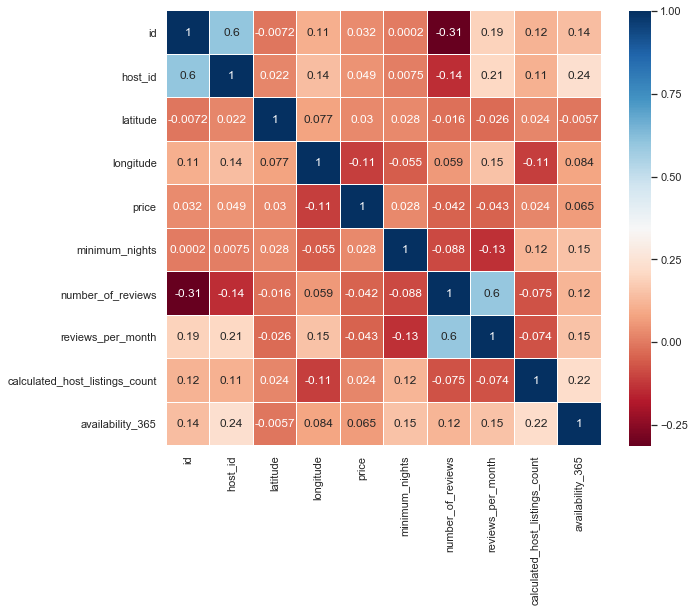

In [137]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=plt.cm.RdBu, linecolor='white', annot=True)

# What are the top words used in name by creating an Airbnb listing?

In [138]:
import csv
from wordcloud import WordCloud

word_list = []
word_list= '\t'.join([str(i) for i in data.name])

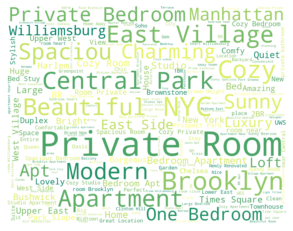

In [139]:
wordcloud = WordCloud(width=900, height=700, background_color="white", colormap="summer").generate(word_list)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


# What is the avarage avarage price per night in NYC?

In [140]:
top_reviewed_listings = data.nlargest(100,'number_of_reviews')
price_avrg = top_reviewed_listings.price.mean()
print('Average price per night: {}'.format(price_avrg))

Average price per night: 94.52


# How do prices of listings vary by location?

In [141]:
data.neighbourhood_group.unique()

array(['Manhattan', 'Brooklyn', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [142]:
sub_1= data.loc[data['neighbourhood_group'] == 'Brooklyn']
sub_2= data.loc[data['neighbourhood_group'] == 'Manhattan']
sub_3= data.loc[data['neighbourhood_group'] == 'Queens']
sub_4= data.loc[data['neighbourhood_group'] == 'Staten Island']
sub_5= data.loc[data['neighbourhood_group'] == 'Bronx']

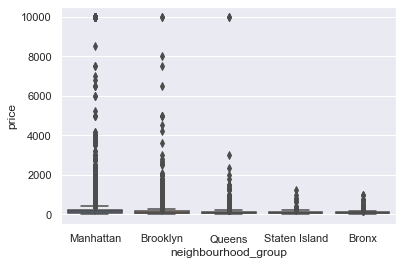

In [143]:
sns.boxplot(x=data.neighbourhood_group, y=data.price)

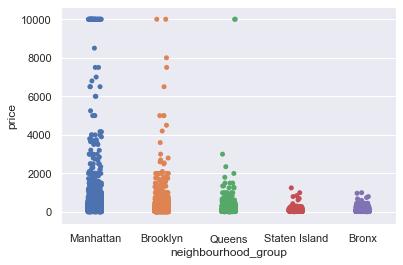

In [144]:
sns.stripplot(x=data.neighbourhood_group, y=data.price)

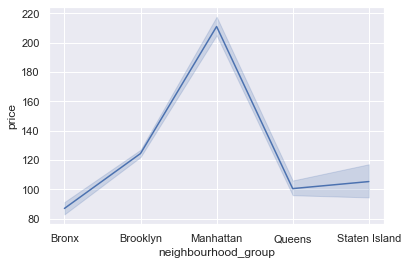

In [145]:
sns.lineplot(x=data.neighbourhood_group, y=data.price)

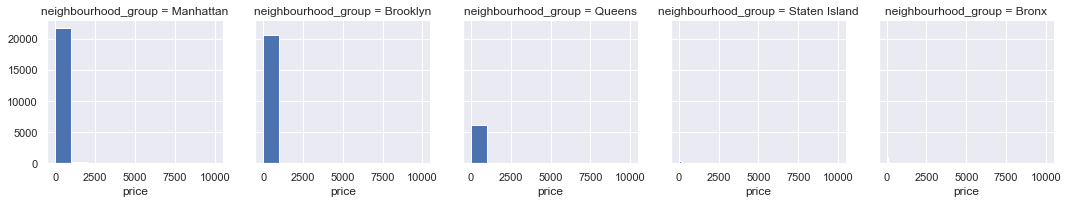

In [146]:
a= sns.FacetGrid(data, col='neighbourhood_group')
a.map(plt.hist, 'price')

In [ ]:
### I NEED TO GET RID OF OUTLIERS IN THE PRICE COLUMN.

# What are the categories in room_type?

In [147]:
data.room_type.unique()

array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

In [148]:
# Room type distribution
room1 = sub_1['room_type'].value_counts()
room2 = sub_2['room_type'].value_counts()
room3 = sub_3['room_type'].value_counts()
room4 = sub_4['room_type'].value_counts()
room5 = sub_5['room_type'].value_counts()
room = pd.DataFrame([room1,room2,room3,room4,room5],index=['Brooklyn','Manhattan','Queens','Staten Island','Bronx'])
room.head()

,Private room,Entire home/apt,Shared room,Hotel room
Brooklyn,10332.0,9866.0,499.0,43.0
Manhattan,7877.0,13386.0,470.0,337.0
Queens,3679.0,2264.0,216.0,37.0
Staten Island,179.0,194.0,5.0,NaN
Bronx,718.0,431.0,66.0,NaN


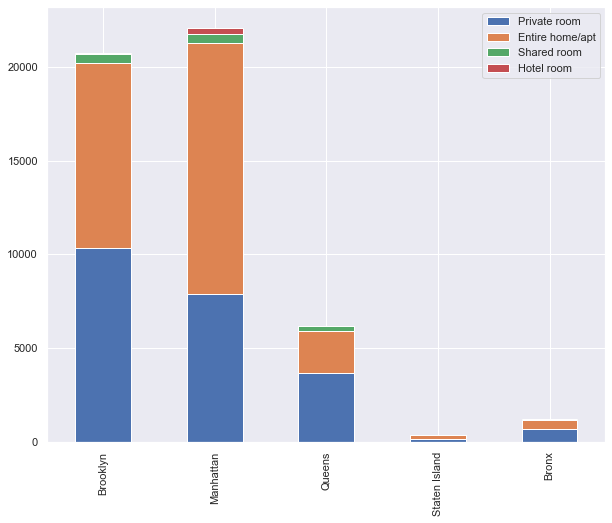

In [149]:
room.plot(kind='bar',stacked=True,figsize=(10,8))

# Which borough's availability over year is higher than others?

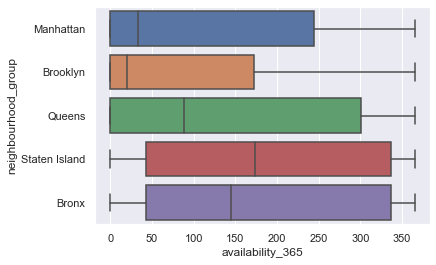

In [150]:
sns.boxplot(x=data.availability_365, y=data.neighbourhood_group)

# How prices vary according to distance from 'Central Park'?

## The latitude of Central Park, New York, NY, USA is 40.785091, and the longitude is -73.968285


# Which location has more hotels? And how this affects other appartments' listing prices?

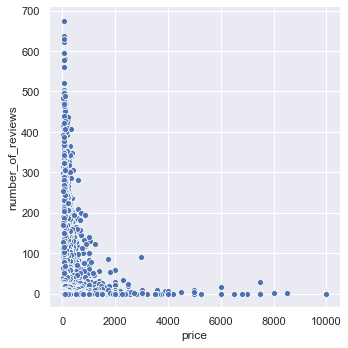

In [151]:
sns.relplot(x='price', y='number_of_reviews', data=data)
#i think I need to ignore the extreme prices

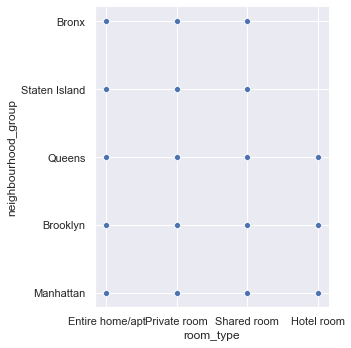

In [152]:
sns.relplot(x='room_type', y='neighbourhood_group', data=data)